In [2]:
%matplotlib inline 
import seaborn as sns
from pymatch.Matcher import Matcher
import pandas as pd         
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import imblearn.ensemble
from numpy import mean
from numpy import std
import xgboost
import scipy.stats
from scipy.stats import ks_2samp
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import statistics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
url=r"C:\Users\egemb\Documents\Data Bootcamp\bank-additional-full.csv"
bank=pd.read_csv(url, sep=';')
bank=bank.drop(['default','emp.var.rate','cons.price.idx','cons.conf.idx','nr.employed'],axis=1)
bank

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,4.857,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,4.857,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,4.857,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,4.857,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,1.028,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,1.028,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,1.028,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,1.028,yes


In [4]:
pd.options.mode.chained_assignment = None
bank_graph=bank.loc[(bank['job']!='unknown')&(bank['marital']!='unknown')&(bank['education']!='unknown')
                   &(bank['housing']!='unknown')&(bank['loan']!='unknown')]
bank_ready=bank.loc[(bank['job']!='unknown')&(bank['marital']!='unknown')&(bank['education']!='unknown')
                   &(bank['housing']!='unknown')&(bank['loan']!='unknown')]

le = LabelEncoder()
bank_ready['job']=le.fit_transform(bank_ready["job"])
bank_ready['marital']=le.fit_transform(bank_ready["marital"])
bank_ready['education']=le.fit_transform(bank_ready["education"])
bank_ready['houisng']=le.fit_transform(bank_ready["housing"])
bank_ready['loan']=le.fit_transform(bank_ready["loan"])
bank_ready['contact']=le.fit_transform(bank_ready["contact"])
bank_ready['month']=le.fit_transform(bank_ready["month"])
bank_ready['day_of_week']=le.fit_transform(bank_ready["day_of_week"])
bank_ready['poutcome']=le.fit_transform(bank_ready["poutcome"])
bank_ready['y']=le.fit_transform(bank_ready["y"])
bank_ready=bank_ready.drop(['housing'],axis=1)
bank_graph

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,4.857,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,4.857,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,4.857,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,4.857,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,1.028,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,1.028,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,1.028,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,1.028,yes


# Checking probability distributions are the same

In [8]:
bank_ready_twice=bank_ready.loc[(bank['poutcome']!='nonexistent')]
bank_ready_twice  
features_twice=bank_ready_twice.iloc[:, np.r_[0:14, 15]]
labels_twice=bank_ready_twice.iloc[:,np.r_[14]]
reg_twice = LogisticRegression().fit(features_twice, labels_twice)
prob_twice=reg_twice.predict_proba(features_twice)[:,1]
prob_twice= pd.DataFrame(prob_twice, columns = ['twice'])
bank_ready_once=bank_ready.loc[(bank['poutcome']=='nonexistent')]
bank_ready_once  
features_once=bank_ready_once.iloc[:, np.r_[0:14, 15]]
labels_once=bank_ready_once.iloc[:,np.r_[14]]
reg_once = LogisticRegression().fit(features_once, labels_once)
prob_once=reg_once.predict_proba(features_once)[:,1]
prob_once= pd.DataFrame(prob_once, columns = ['once'])

C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

In [9]:
#compute Jensen Shannon Divergence
q=prob_twice['twice'].to_numpy()
pr=[]
for i in range (1,1000):
    prep=prob_once.sample(n=5179)
    p=prep['once'].to_numpy()
    m=(p+q)/2
    divergence = (scipy.stats.entropy(p, m) + scipy.stats.entropy(q, m)) / 2
    sqrt11 = np.sqrt(divergence)
    pr.append(sqrt11)
ave=statistics.mean(pr)
print(ave)

0.5945148015912228


### We have tested the hypothesis that two probability distribuitons are the same. Acceptance of this hypothesis could allow us to generalize results obtained from analysis of clients who participated in marketing campaign twice. As we can see from the computed value of Jensen Shannon Divergence, two probability distributions are not the same. This means that those two groups of clients are different.

<function matplotlib.pyplot.show(*args, **kw)>

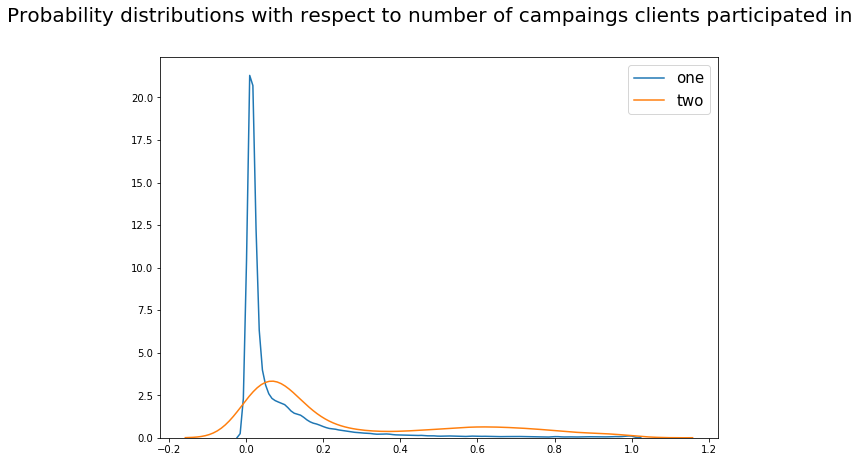

In [10]:
plt.figure(figsize=(10,7))
sns.distplot(prob_once['once'], label='one', hist=False, rug=False)
sns.distplot(prob_twice['twice'], label='two', hist=False, rug=False)
plt.legend(loc='best', prop={'size': 15})
plt.suptitle('Probability distributions with respect to number of campaings clients participated in', fontsize=20)
plt.xlabel('', fontsize=1)
plt.ylabel('', fontsize=1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

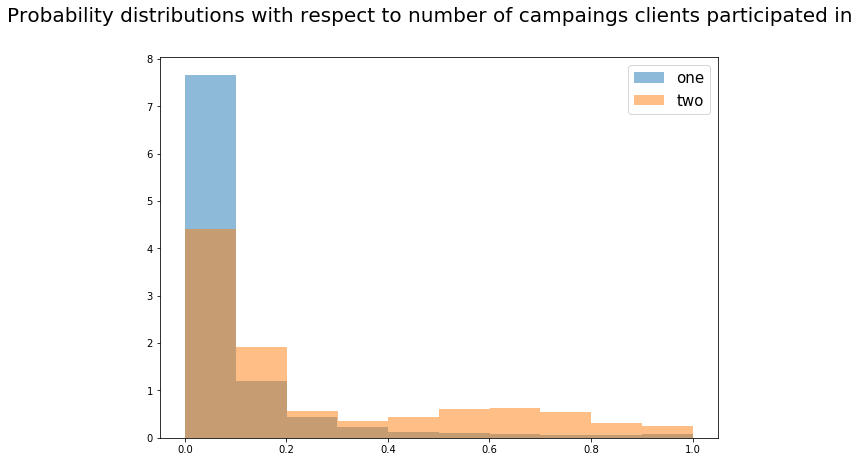

In [11]:
plt.figure(figsize=(10,7))
plt.hist(prob_once['once'],label='one',alpha=0.5,density=True)
plt.hist(prob_twice['twice'],label='two',alpha=0.5,density=True)
plt.legend(loc='best', prop={'size': 15})
plt.suptitle('Probability distributions with respect to number of campaings clients participated in', fontsize=20)
plt.xlabel('', fontsize=1)
plt.ylabel('', fontsize=1)
plt.show

### From above graphs we can clearly see that two distributions are different.

# Creating train/test sets

In [12]:
features=bank_ready.iloc[:, np.r_[0:14, 15]]
labels=bank_ready.iloc[:,np.r_[14]]

In [13]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.2, random_state = 100,stratify=labels)
test_features

,age,job,marital,education,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,euribor3m,houisng
30877,52,1,1,3,0,0,6,3,57,1,999,0,1,1.344,0
31058,36,4,1,2,1,0,6,4,438,1,999,0,1,1.334,1
31903,35,4,1,6,0,0,6,2,437,3,999,1,0,1.327,0
1344,30,0,0,3,0,1,6,2,177,1,999,0,1,4.855,1
8204,50,6,1,6,0,1,4,3,157,1,999,0,1,4.864,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32162,57,5,2,6,0,0,6,0,208,1,999,0,1,1.313,0
11334,26,1,2,2,0,1,4,2,60,4,999,0,1,4.961,0
2217,54,9,1,6,1,1,6,1,123,7,999,0,1,4.857,0
13805,30,6,1,6,0,1,3,2,148,20,999,0,1,4.963,1


### For further analysis we need to split our data into features and labels. Labels are values of the response variable - outcome of the marketing campaign. The rest of the variables are features. We also split data set into training and test data sets to perform predictions evaluation while applying machine learning models. We use startification by response variable to get equal proportions of each class in training and test sets. We do this as we deal with imbalanced classes problem: the number of people refused to place deposit is much higher.

# PCA Dimensionality Reduction

In [15]:
scaler=StandardScaler()
segm_std=scaler.fit_transform(features)
pca=PCA()
pca.fit(segm_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.explained_variance_ratio_

array([0.14164535, 0.1003969 , 0.09680923, 0.08607235, 0.07227602,
       0.07023262, 0.06807311, 0.06569944, 0.06327945, 0.06069146,
       0.05479032, 0.04679223, 0.03964985, 0.02886705, 0.00472462])

Text(0, 0.5, 'Cumulative Explained Variance')

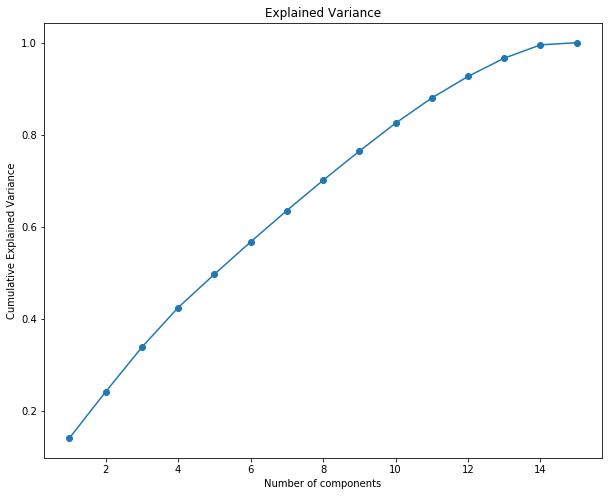

In [17]:
plt.figure(figsize=(10,8))
plt.plot(range(1,16),pca.explained_variance_ratio_.cumsum(),marker='o')
plt.title('Explained Variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

### We checked two groups of clients are different. Thus, to conduct further analysis we must use different approach. We will conduct clustering analysis to break down clients into segments. But before we do this we need to reduce our data dimesionality. Above graph shows number of components and corresponding variance explained. We choose 7 components which explain more about 70% of total variance. In this way we reduced data dimesionality by factor of 2.

In [20]:
pca=PCA(n_components=7, random_state=100)
pca.fit(segm_std)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
pca.transform(segm_std)

array([[-1.40300051,  2.07240587, -0.75762518, ..., -0.09475734,
        -0.45504831,  0.57519531],
       [-1.23304952,  1.46402936, -0.31556436, ..., -0.81360496,
        -1.44981134, -0.36055963],
       [-1.00474204,  0.31382616,  0.12851287, ..., -0.37202539,
        -0.45156355, -1.14853978],
       ...,
       [ 0.96867377,  0.41824241, -0.63668304, ..., -0.84439156,
        -0.26358617, -0.86687783],
       [ 0.95905101,  0.03627052, -0.2414894 , ..., -0.39266288,
        -1.73202055, -0.29870899],
       [ 2.26603955,  0.94431143, -3.33292379, ..., -1.53601032,
        -0.54531015, -0.80989598]])

In [22]:
scores_pca=pca.transform(segm_std)

In [23]:
wcss=[]
for i in range(1,20):
    k_pca=KMeans(n_clusters=i,init='k-means++',random_state=100)
    k_pca.fit(scores_pca)
    wcss.append(k_pca.inertia_)

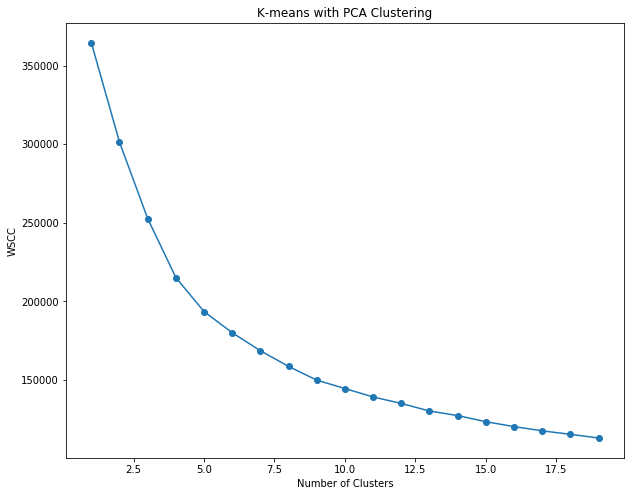

In [24]:
plt.figure(figsize=(10,8))
plt.plot(range(1,20),wcss,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WSCC')
plt.title('K-means with PCA Clustering')
plt.show()

### We apply elbow method to identify appropriate number of clasters. We select such number of clusters that after this number the delcine speed of the curve stays the same. Using this rule we select 4 clusters.

In [25]:
k_pca=KMeans(n_clusters=4, init='k-means++',random_state=100)
k_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [26]:
k_pca_df=pd.concat([features.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
k_pca_df.columns.values[-7:]=['component 1','component 2','component 3','component 4',
                              'component 5','component 6','component 7']
k_pca_df['segments']=k_pca.labels_
bank_graph['segments']=k_pca.labels_
k_pca_df

,age,job,marital,education,loan,contact,month,day_of_week,duration,campaign,...,euribor3m,houisng,component 1,component 2,component 3,component 4,component 5,component 6,component 7,segments
0,56,3,1,0,0,1,6,1,261,1,...,4.857,0,-1.403001,2.072406,-0.757625,0.943943,-0.094757,-0.455048,0.575195,2
1,57,7,1,3,0,1,6,1,149,1,...,4.857,0,-1.233050,1.464029,-0.315564,0.438523,-0.813605,-1.449811,-0.360560,2
2,37,7,1,3,0,1,6,1,226,1,...,4.857,1,-1.004742,0.313826,0.128513,0.800052,-0.372025,-0.451564,-1.148540,2
3,40,0,1,1,0,1,6,1,151,1,...,4.857,0,-1.354837,1.145592,-0.380527,1.533558,-0.184343,0.100907,0.991726,2
4,56,7,1,3,1,1,6,1,307,1,...,4.857,0,-1.185552,1.359375,-0.247557,0.357767,-0.379389,-0.053032,-1.740453,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,73,5,1,5,0,0,7,0,334,1,...,1.028,1,0.949409,1.507422,-1.162665,-1.139928,-0.311892,-0.427130,-0.934860,1
38241,46,1,1,5,0,0,7,0,383,1,...,1.028,0,0.854666,0.383037,-0.579123,0.297272,-0.062928,-0.409767,0.805827,1
38242,56,5,1,6,0,0,7,0,189,2,...,1.028,1,0.968674,0.418242,-0.636683,-0.712114,-0.844392,-0.263586,-0.866878,1
38243,44,9,1,5,0,0,7,0,442,1,...,1.028,0,0.959051,0.036271,-0.241489,-0.032774,-0.392663,-1.732021,-0.298709,1


### Finally, we apply K-Means to components. In each step of PCA and K-Means estimation we control for randomness to get consistent results. We append obtained components and cluster to the rest data set. Now we are ready to perform further analysis.

# Segments Analysis

In [27]:
bank_graph

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,euribor3m,y,segments
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,4.857,no,2
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,4.857,no,2
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,4.857,no,2
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,4.857,no,2
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,4.857,no,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,1.028,yes,1
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,1.028,no,1
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,1.028,no,1
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,1.028,yes,1


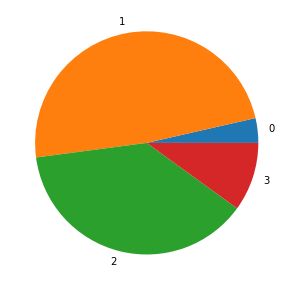

In [33]:
plt.figure(figsize=(5,5))
pie_ch=bank_graph.groupby(bank_graph['segments']).count()
plt.axis('equal')
plt.pie(pie_ch['age'], labels=pie_ch.index)
plt.show()

### We see from pie chart that segments 1 and 2 are the most represented segments. However we are interested in assesing efficiency of this marketing campaign. We must look at portion of positive outcomes in each segment.

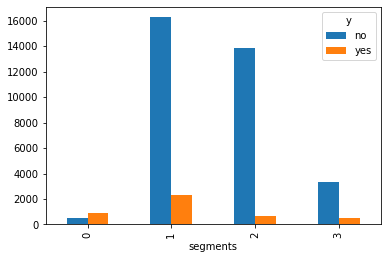

In [57]:
bch=bank_graph[['y','segments']]
table = pd.pivot_table(bch, index=['segments'],columns=['y'], aggfunc=len)
table.plot.bar()

### As we can see from the bar chart the most efficient segment is segment 0. Proportion of positive outcomes is even higher then proportion of negative outcomes. Other segments are less efficient. Let's calculate exact conversion rates for each segment.

In [41]:
conv=bch
conversion_rate_0=conv.loc[(conv['y']=='yes')&(conv['segments']==0)].count()/conv.loc[conv['segments']==0].count()*100
conversion_rate_1=conv.loc[(conv['y']=='yes')&(conv['segments']==1)].count()/conv.loc[conv['segments']==1].count()*100
conversion_rate_2=conv.loc[(conv['y']=='yes')&(conv['segments']==2)].count()/conv.loc[conv['segments']==2].count()*100
conversion_rate_3=conv.loc[(conv['y']=='yes')&(conv['segments']==3)].count()/conv.loc[conv['segments']==3].count()*100
print('segment 0') 
print(conversion_rate_0['y'])
print('segment 1') 
print(conversion_rate_1['y'])
print('segment 2')
print(conversion_rate_2['y'])
print('segment 3')
print(conversion_rate_3['y'])

segment 0
63.32357247437774
segment 1
12.308687217072645
segment 2
4.397573752412462
segment 3
12.346002621231978


### Now we know that conversion rate for segment 0 is 63.32%. As it turned out the least efficient segment is segment 2 with onversion rate only 4.40%. Other two segments show approximately the same conversion rate regarding each other.

In [42]:
conversion_rate_0_yes=conv.loc[(conv['y']=='yes')&(conv['segments']==0)].count()/conv.loc[conv['y']=='yes'].count()*100
conversion_rate_1_yes=conv.loc[(conv['y']=='yes')&(conv['segments']==1)].count()/conv.loc[conv['y']=='yes'].count()*100
conversion_rate_2_yes=conv.loc[(conv['y']=='yes')&(conv['segments']==2)].count()/conv.loc[conv['y']=='yes'].count()*100
conversion_rate_3_yes=conv.loc[(conv['y']=='yes')&(conv['segments']==3)].count()/conv.loc[conv['y']=='yes'].count()*100
print('segment 0') 
print(conversion_rate_0_yes['y'])
print('segment 1') 
print(conversion_rate_1_yes['y'])
print('segment 2')
print(conversion_rate_2_yes['y'])
print('segment 3')
print(conversion_rate_3_yes['y'])

segment 0
20.314701737905118
segment 1
53.64020666979803
segment 2
14.983560356975106
segment 3
11.061531235321748


### But we may want to know not only conversion rate within each segment. We may be also interested in performance of each segment with respect to total number of positive and negative outcomes. From rates above we can conclude that segment 2 carries more then a half of all positive outcomes. It might be interesting to bank's managment regardless this segment's relatively low conversion rate (12.31%). They might still want to invest time and effort to get those additional deposits. The possible reason could be increase in market share. Also they could target some indicators in absolute terms.

In [43]:
conversion_rate_0_no=conv.loc[(conv['y']=='no')&(conv['segments']==0)].count()/conv.loc[conv['y']=='no'].count()*100
conversion_rate_1_no=conv.loc[(conv['y']=='no')&(conv['segments']==1)].count()/conv.loc[conv['y']=='no'].count()*100
conversion_rate_2_no=conv.loc[(conv['y']=='no')&(conv['segments']==2)].count()/conv.loc[conv['y']=='no'].count()*100
conversion_rate_3_no=conv.loc[(conv['y']=='no')&(conv['segments']==3)].count()/conv.loc[conv['y']=='no'].count()*100
print('segment 0') 
print(conversion_rate_0_no['y'])
print('segment 1') 
print(conversion_rate_1_no['y'])
print('segment 2')
print(conversion_rate_2_no['y'])
print('segment 3')
print(conversion_rate_3_no['y'])

segment 0
1.4740930355724249
segment 1
47.877129490687615
segment 2
40.80972136405096
segment 3
9.839056109688999


### On the other hand, if we look at rejection statistics, segment 1 is still in the lead. So it's up to bank's management to decide if the cost of working on this segment is worth gain in revenue or market share. But from this statistics we can conclude that segment 2 is the worst segment with 4.40% conversion rate and 40.81% of total rejections number.

# Segment 0 Analysis (most efficient)

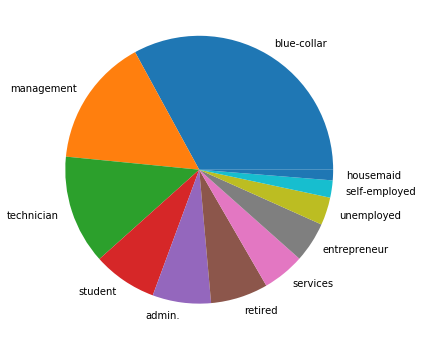

In [45]:
plt.figure(figsize=(6,6))
bank_seg0=bank_graph.loc[bank_graph['segments']==0]
bank_seg0_yes=bank_seg0.loc[bank_graph['y']=='yes']
plt.axis('equal')
plt.pie(bank_seg0_yes['job'].value_counts(),labels=bank_seg0_yes['job'].unique())
plt.show()

### We start with analysis of the most efficient segment. We study breakdown by job of positive outcomes in segment 0. Surprisingly, the largest share is belong to blue collar workers. Also substantial part is occupied by management and technicians.

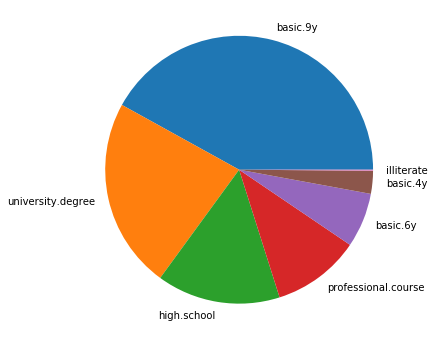

In [46]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg0_yes['education'].value_counts(),labels=bank_seg0_yes['education'].unique())
plt.show()

### Breakdown by education starts to make previous result consistent in some way. Most clients of this segment who decided to place the deposit have 9 years of basic education. Probably, that is what we expect from people: to work as blue-collar with such level of education. Another huge part is people with university degree, who are most likely managers.

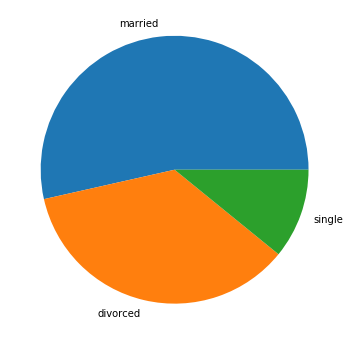

In [47]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg0_yes['marital'].value_counts(),labels=bank_seg0_yes['marital'].unique())
plt.show()

### Most clients are married or divorced. Little space for middle ground (to be single) is this segment's positive outcomes.

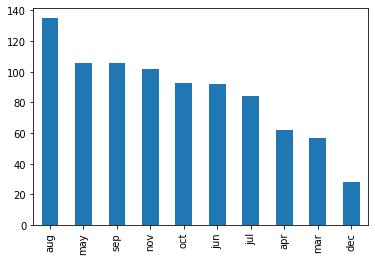

In [113]:
bank_seg0_yes['month'].value_counts().plot.bar()

### The least successful month to contact is december, the most - august. April and March are little bit lower than the rest months. May, September, November, October and July are approximately at the same high level. 

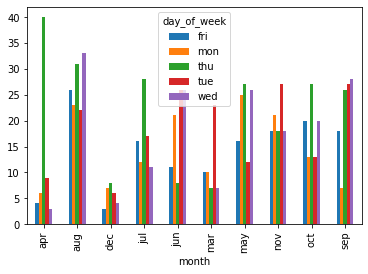

In [119]:
bank_seg0_yes_md=bank_seg0_yes[['month','day_of_week']]
table_md = pd.pivot_table(bank_seg0_yes_md, index=['month'],columns=['day_of_week'], aggfunc=len)
table_md.plot.bar()

### Wednesday and Thursday are the best days to contact people in August. We can also see that Tuesday demostrates outstanding performance in May. December is still the worst month in this breakdown. We can also notice Thursday in April as the best day overall.

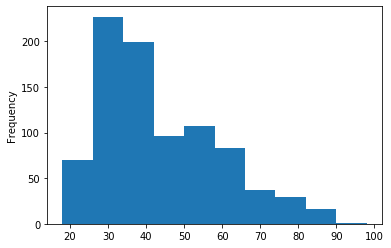

In [125]:
bank_seg0_yes['age'].plot.hist()

### We can make a conclusion that the majority of people are at their's 30s and 40s.

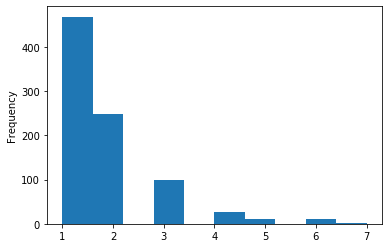

In [122]:
bank_seg0_yes['campaign'].plot.hist()

### Most clients were contacted no more than twice during this campaign

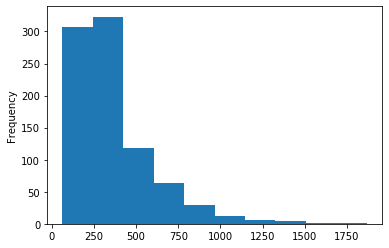

In [124]:
bank_seg0_yes['duration'].plot.hist()

### Call duration was about 360 seconds or 6 minutes

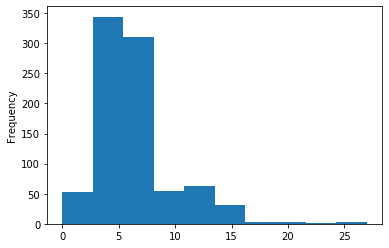

In [126]:
bank_seg0_yes['pdays'].plot.hist()

### Most clients were contacted within 8 days from previous campaign (if they participated)

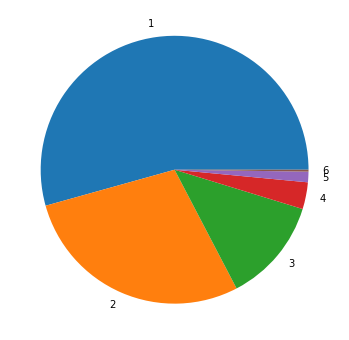

In [48]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg0_yes['previous'].value_counts(),labels=bank_seg0_yes['previous'].unique())
plt.show()

### Clients were contacted mostly no more than 2 times before current campaign.

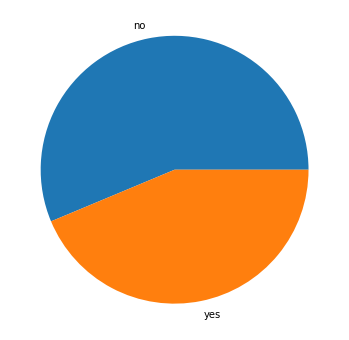

In [49]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg0_yes['housing'].value_counts(),labels=bank_seg0_yes['housing'].unique())
plt.show()

### Housing loan distribuiton among clients is more or less even.

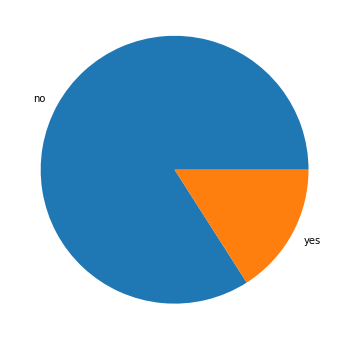

In [50]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg0_yes['loan'].value_counts(),labels=bank_seg0_yes['loan'].unique())
plt.show()

### Large part of clients do not have personal loans.

# Segment 2 Analysis (least efficient in both terms)

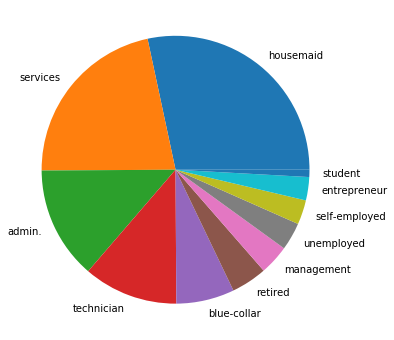

In [51]:
bank_seg2=bank_graph.loc[bank_graph['segments']==2]
bank_seg2_no=bank_seg2.loc[bank_graph['y']=='no']
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg2_no['job'].value_counts(),labels=bank_seg2_no['job'].unique())
plt.show()

### Now we study negative outcomes in least efficient segment 2. Housemaids, service employees and administrative staff are prevail in this segment. 

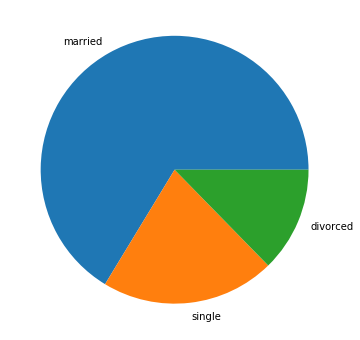

In [52]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg2_no['marital'].value_counts(),labels=bank_seg2_no['marital'].unique())
plt.show()

### Most people are married

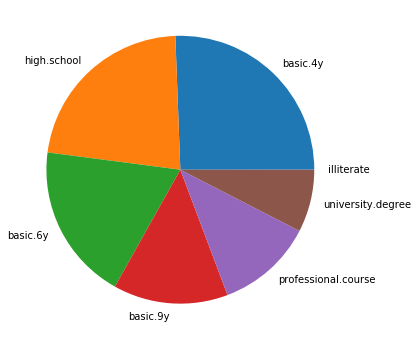

In [53]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg2_no['education'].value_counts(),labels=bank_seg2_no['education'].unique())
plt.show()

### In this least efficient segment more people have lower level of education compared to most efficient.

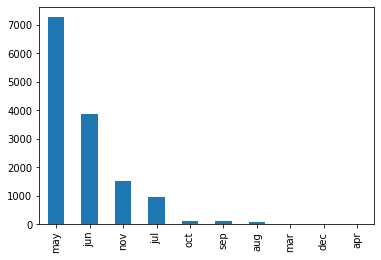

In [135]:
bank_seg2_no['month'].value_counts().plot.bar()

### Bank received most part of negative outcomes from this segment contacting clients in may

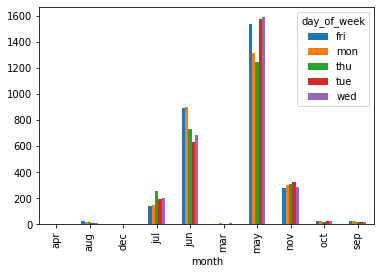

In [136]:
bank_seg2_no_md=bank_seg2_no[['month','day_of_week']]
table_md = pd.pivot_table(bank_seg2_no_md, index=['month'],columns=['day_of_week'], aggfunc=len)
table_md.plot.bar()

### In week day breakdown we also see May as the worst month

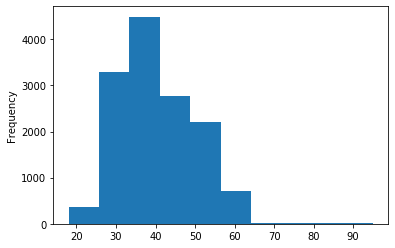

In [137]:
bank_seg2_no['age'].plot.hist()

### Age distribution is more skewed to people older than 35

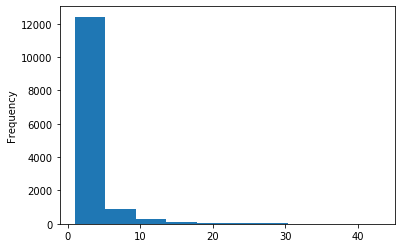

In [55]:
bank_seg2_no['campaign'].plot.hist()

### People contacted no more than 5 times (redefine x axis)

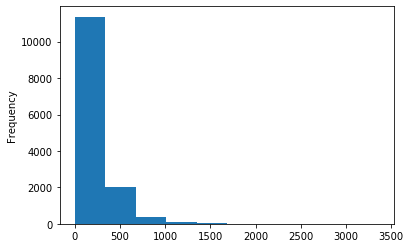

In [142]:
bank_seg2_no['duration'].plot.hist()

### Approximate duration is about 5 minutes

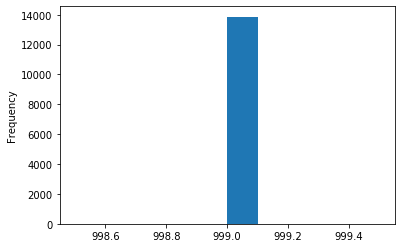

In [143]:
bank_seg2_no['pdays'].plot.hist()

### Clients from this segment with negative outcome did not participate in previous campaign. Also those people were not contacted before this campaign.

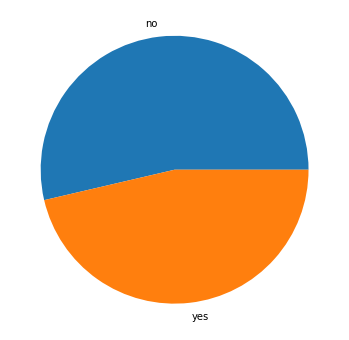

In [58]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg2_no['housing'].value_counts(),labels=bank_seg2_no['housing'].unique())
plt.show()

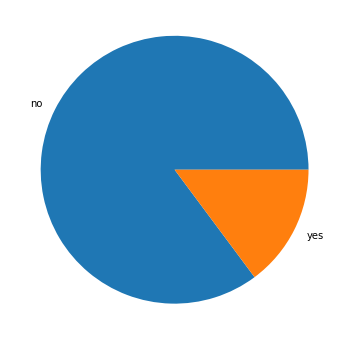

In [59]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg2_no['loan'].value_counts(),labels=bank_seg2_no['loan'].unique())
plt.show()

### Distribution for housing and personal loans is the same as for segment 0.

# Segment 1 Analysis (most positive outcomes in absolute value)

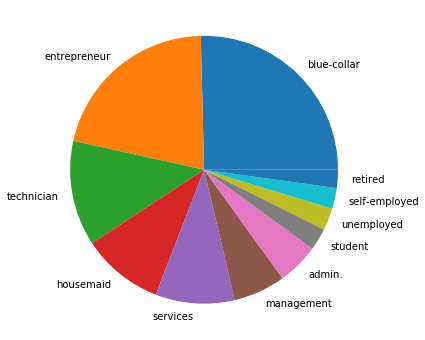

In [60]:
bank_seg1=bank_graph.loc[bank_graph['segments']==1]
bank_seg1_yes=bank_seg2.loc[bank_graph['y']=='yes']
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg1_yes['job'].value_counts(),labels=bank_seg1_yes['job'].unique())
plt.show()

### Segment 1 contains most part of people who agreed to place deposit. Blue collars, enterpreneurs and technicians are best represented job ocupatons in this segment.

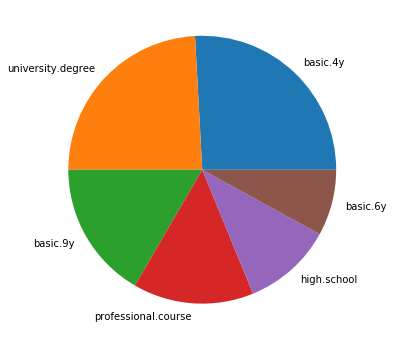

In [61]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg1_yes['education'].value_counts(),labels=bank_seg1_yes['education'].unique())
plt.show()

### Those people have mostly university degree, 4 and 9 years of basic education

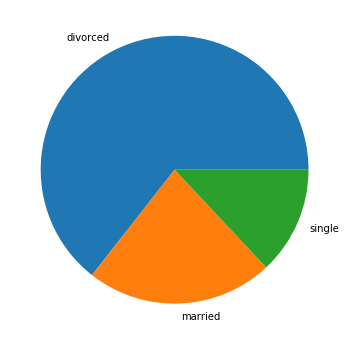

In [62]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg1_yes['marital'].value_counts(),labels=bank_seg1_yes['marital'].unique())
plt.show()

### Unlike previously studied segments, this segment contains large portion of divorced people

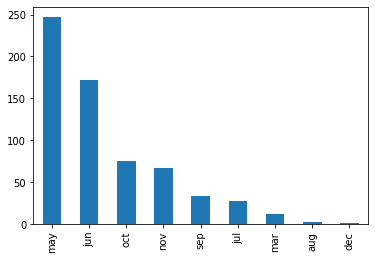

In [153]:
bank_seg1_yes['month'].value_counts().plot.bar()

### May shows most positive outcomes. But May also demonstrated most rejections for segment 2. Probably we should pay more attention to June, October and November.

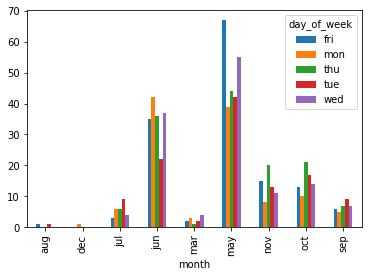

In [154]:
bank_seg1_yes_md=bank_seg1_yes[['month','day_of_week']]
table_md = pd.pivot_table(bank_seg1_yes_md, index=['month'],columns=['day_of_week'], aggfunc=len)
table_md.plot.bar()

### For June all week days except Tuesday demonstrate relatively even performance.

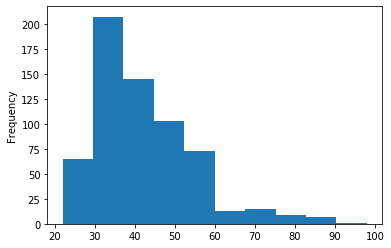

In [155]:
bank_seg1_yes['age'].plot.hist()

### Age distribution is more similar to segement 0

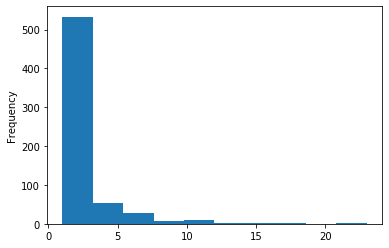

In [157]:
bank_seg1_yes['campaign'].plot.hist()

### Most clients were contacted no more than 3 times. Which is close to 2 times in segment 0.

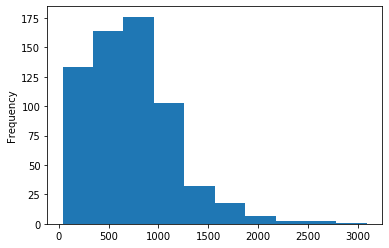

In [158]:
bank_seg1_yes['duration'].plot.hist()

### Distribution of call duration is different from previous segments. Most calls last more than 8 minutes. Also most clients did not participate in previous campaign. They were not contacted before this campaign as well.

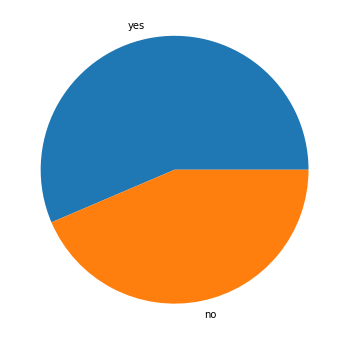

In [65]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg1_yes['housing'].value_counts(),labels=bank_seg1_yes['housing'].unique())
plt.show()

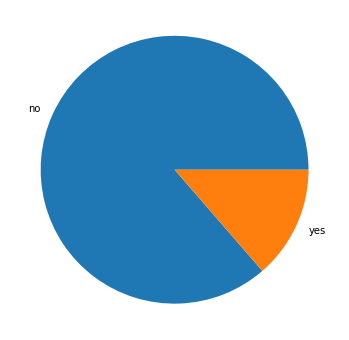

In [66]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(bank_seg1_yes['loan'].value_counts(),labels=bank_seg1_yes['loan'].unique())
plt.show()

### Distribution for hosing and personal loans is the same as for previously analized segments

# RANDOM FOREST

In [116]:
rf = BalancedRandomForestClassifier()
grid_rf = {'max_depth': np.arange(1, 20, 1), 'max_features':['auto', 'sqrt']}
rf_opt = GridSearchCV(rf, grid_rf, cv=5)
rf_opt.fit(train_features, train_labels)
rf_opt.best_params_

C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

{'max_depth': 16, 'max_features': 'auto'}

In [68]:
rf1 = BalancedRandomForestClassifier(n_estimators=1000, max_depth = 16, max_features='auto')
rf2=rf1.fit(train_features,train_labels)
cv_scores = cross_val_score(rf2, test_features, test_labels, cv=5)
print('Cross-validation scores')
print(cv_scores)
print('Mean score')
print(mean(cv_scores))


C:\Users\egemb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Cross-validation scores
[0.83660131 0.8496732  0.84575163 0.83202614 0.86003924]
Mean score
0.8448183057831808


In [119]:
random_forest = BalancedRandomForestClassifier(n_estimators=1000, max_depth=16, max_features='auto')
random_forest.fit(train_features,train_labels)
random_forest_predict = random_forest.predict(test_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
n_scores = cross_val_score(random_forest, train_features, train_labels, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("=== Confusion Matrix ===")
print(confusion_matrix(test_labels, random_forest_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_labels, random_forest_predict))
print('\n')
print("=== All AUC Scores ===")
print(n_scores)
print('\n')

C:\Users\egemb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.850 (0.007)
=== Confusion Matrix ===
[[5678 1119]
 [  50  802]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      6797
           1       0.42      0.94      0.58       852

    accuracy                           0.85      7649
   macro avg       0.70      0.89      0.74      7649
weighted avg       0.93      0.85      0.87      7649



=== All AUC Scores ===
[0.84673203 0.85359477 0.85065359 0.85620915 0.83954248 0.85359477
 0.85093168 0.85779667 0.84668192 0.84864335 0.85392157 0.85326797
 0.84313725 0.83660131 0.8496732  0.84738562 0.84766263 0.87119974
 0.83981693 0.85681595 0.85294118 0.85228758 0.8503268  0.84183007
 0.84444444 0.86045752 0.84373978 0.85943119 0.85354691 0.84668192]




### We choose max_depth of 16 and max_feature auto selection as the resault of cross-validation. Number of trees is correlated positively with model's performance: more the better. Thus, we use 1000 trees. Average cross-validation score is 84.48%. 
### From performance metrics above we see that balanced random forest's test accuracy is 85%. For this classification problem we are more interested in correcct positive class prediction. In confusion matrix this is number in bottom right corner. So from 852 clinets who placed deposit we correctly predicted 802 of them.

Text(0.5, 0, 'Relative Importance')

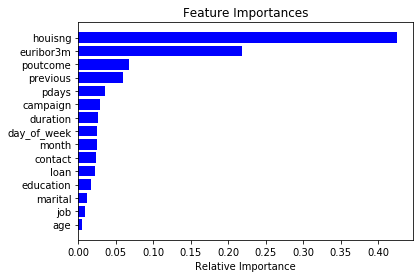

In [179]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features)
plt.xlabel('Relative Importance')

### The most important features selected by random forest are housing, daily interest rate for 3 month deposits, outcome of the previous campaign and number of contacts before current campaign

[[5678 1119]
 [  50  802]]


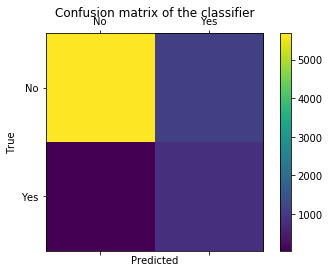

In [161]:
labels = ['No', 'Yes']
cm = confusion_matrix(test_labels, random_forest_predict)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# XGBOOST

In [16]:
xgb = XGBClassifier()
grid_xgb = {'n_estimators':np.arange(55,65,1),'max_depth': np.arange(1, 5, 1)}
xgb_opt = GridSearchCV(xgb, grid_xgb, cv=5,n_jobs = -1)
xgb_opt.fit(train_features, train_labels)
xgb_opt.best_params_

C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_depth': 3, 'n_estimators': 58}

In [71]:
xgb1 = XGBClassifier(n_estimators=58, max_depth = 3, learning_rate=0.001,random_state=100,scale_pos_weight=7)
xgb2=xgb1.fit(train_features,train_labels)
cv_scores_xgb = cross_val_score(xgb2, test_features, test_labels, cv=5)
print('Cross-validation scores')
print(cv_scores_xgb)
print('Mean score')
print(mean(cv_scores_xgb))

C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egemb\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Cross-validation scores
[0.85555556 0.87843137 0.81633987 0.85228758 0.86527142]
Mean score
0.8535771596626442


In [70]:
model_xgb = XGBClassifier(n_estimators=58,max_depth=3,learning_rate=0.001,random_state=100,scale_pos_weight=7)
model_xgb.fit(train_features,train_labels)
model_xgb_predict = model_xgb.predict(test_features)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
n_scores = cross_val_score(model_xgb, train_features, train_labels, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("=== Confusion Matrix ===")
print(confusion_matrix(test_labels, model_xgb_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_labels, model_xgb_predict))
print('\n')
print("=== All AUC Scores ===")
print(n_scores)
print('\n')

Accuracy: 0.868 (0.009)
=== Confusion Matrix ===
[[5951  846]
 [ 160  692]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      6797
           1       0.45      0.81      0.58       852

    accuracy                           0.87      7649
   macro avg       0.71      0.84      0.75      7649
weighted avg       0.92      0.87      0.88      7649



=== All AUC Scores ===
[0.85196078 0.87089394 0.86370322 0.87399902 0.86435692 0.8753268
 0.85177317 0.85324399 0.88118974 0.87089394 0.87075163 0.87089394
 0.87334532 0.87939206 0.8668083 ]




### Unlike random forest, XGBoost model could suffer from overfitting if number of estimators is too large. So we must cross validate over this parameter too. Learning parameter is set to 0.001. We also use weight parameter to account for imbalassed classes. From cross-validation we get number of estimators of 58 and max_deph of 3. Average cross-validation score is 85.36%.
### Test accuracy of the model is 86.8%. It is higher than for random forest. However, this model makes worse prediction for positive class. Out of 852 people who placed deposit it predicted only 692 of them.

Text(0.5, 0, 'Relative Importance')

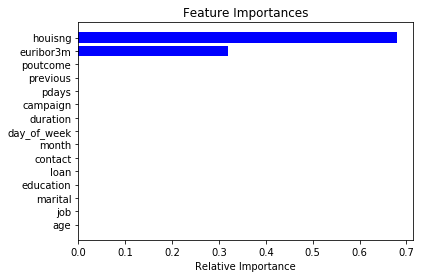

In [73]:
importances = model_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features)
plt.xlabel('Relative Importance')

### Like Random Forest, XGBoost considers housing loan and 3 motnh deposit rate as important variables.

[[6040  757]
 [ 110  742]]


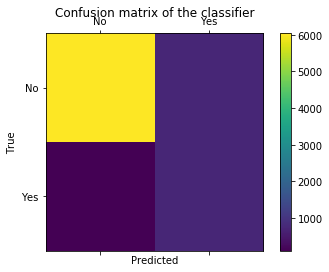

In [152]:
labels = ['No', 'Yes']
cm = confusion_matrix(test_labels, model_xgb_predict)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Conclusions

### We checked the hypothesis about similarity between probability distributions of two groups of clients. One group of people participated twice, another - once. Those probabilities are likelihood of clients' positive outcome during marketing campaign. From calculated statistical distance we rejected that hypothesis. It means that those groups are different in terms of positive outcome likelihood.  To conduct further analysis we reduced data dimensionality using PCA. We performed K-Means clustering based on 7 principal components, which explain 70% of overall variance in data. We end up with 4 clusters. We focused on conversion rate's analysis and demographic characteristics, which could be attributed to that performance. We identify 3 key segments: most efficient, least efficient and efficient in total numbers of positive outcome (placing deposit). Segment 0 is most efficient segment with positive outcomes more than rejections. Segment 2 is the least efficient segment in terms of relative and absolute performance. Segment 1 contains most part of clients who placed deposits.
### Recommendations
### We suggest that bank should classify new coming clients into obtained clusters. The optimal solution would be focus on segment 0 and segment 2. In addition to this, bank should study clients' social-economic features within each segment. 
### As it stands for now, for segment 0 the ideal client to be targeted would be: blue color worker / manager / technician with 9 years of basic education / university degree / high school, maried or divorced, at the age of 30s or 40s. It is recommended to contact such client no more than 2 times before campaign and no more than two times during campaign. 
### Bank should avoid spending its resources on segment 2, especially on following clients: housmade / services employee / administrative staff with 4 or 6 years of basic education / high school. They are usually older than 35 years old. They did not participate in previous campaign. 
### Bank my also consider working on segment 1 if it wants to increase market share or improve some absolute indicators. Bank should target following clients within this segment: blue color / technician / entrepreneur with 4 or 9 years of basic education / university degree. They are in their 30s or 40s and divorced. Bank should contact them no more than 3 times during marketing campaign.
### Classification
### We also built machine learing models to perform classification task. We chose Balanced Random Forest and XGBoost with weight to account for imbalanced classification problem: number of clients who rejected to place deposit is much higher. XGBoost outperformed Random Forest in terms of general accuracy. But we are more interested in positive class prediction, which random forest performed better than XGBoost. We could also combine those models to obtain better performance for each class.